<h3>KNN:</h3>

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [91]:
# Leemos el dataset:
data=pd.read_csv("iris.csv")
#quitamos las columnas que no tienen mucha correlacion con la clase
data = data.drop(columns=["Id"])
#indicamos que la columna de clase es tipo categorica 
data.Species=pd.Categorical(data.Species)
data.Species= data.Species.cat.codes

# Separamos el dataset en Train, Validation, Test:
# Utilizamos una proporción 80:10:10

train_size = 0.65
test_size = 0.5 # Del resto

folds = 5 # k-folds

X = data.drop(columns = ['Species']).copy()
Y = data['Species']

# Partimos el dataset en Train y el resto:
X_train, X_rest, Y_train, Y_rest = train_test_split(X,Y, train_size=train_size)

# Dividimos el resto a la mitad:
X_valid, X_test, Y_valid, Y_test = train_test_split(X_rest,Y_rest, test_size=test_size)

print(X_train.shape)
print(Y_train.shape)
print()
print(X_valid.shape)
print(Y_valid.shape)
print()
print(X_test.shape)
print(Y_test.shape)

(97, 4)
(97,)

(26, 4)
(26,)

(27, 4)
(27,)


[0.8399999999999999, 0.9199999999999999, 0.9199999999999999, 0.96, 0.96, 0.9199999999999999, 0.96, 0.9199999999999999, 0.7266666666666668, 0.7266666666666668]


Text(0, 0.5, 'accuracy')

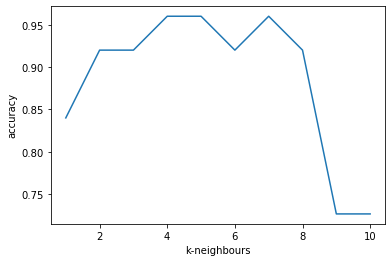

In [92]:
# Entrenamos el clasifcador KNN:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Tuneamos los hiperparámetros (en este caso el número de k vecinos):
## Buscamos de 1 a 10 cuál da el mejor resultado con pruebas de validación cruzada:

scores_list = []

for k in range(1, 11):
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train, Y_train)

    prediction = KNN.predict(X_valid)

    current_scores = cross_val_score(KNN, X_valid, Y_valid, cv=folds)
    scores_list.append(current_scores.mean())

print(scores_list)

# Graficamos los resultados para decidir qué valor de k utilizar:
plt.plot(range(1, 11), scores_list)
plt.xlabel("k-neighbours")
plt.ylabel("accuracy")
    

In [93]:
# Decidimos que el valor k adecuado para nuestro clasificador KNN es 5:
k = 5

# Entrenamos nuestro clasificado juntando Train + Validation:
X_train_final = pd.concat([X_train, X_valid])
Y_train_final = pd.concat([Y_train, Y_valid])

print(X_train_final.shape)
print(Y_train_final.shape)

#print(X_train_final)
#print(Y_train_final)

(123, 4)
(123,)


In [94]:
from sklearn import metrics

KNN = KNeighborsClassifier(n_neighbors=k)
KNN.fit(X_train_final, Y_train_final)
predictions = KNN.predict(X_test)

knn_score = metrics.accuracy_score(Y_test, predictions)

print(knn_score)

0.9629629629629629


<h3>SVM</h3>